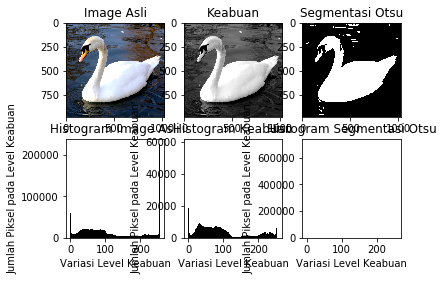

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk membaca citra
def inputCitra(im):
    hasil = plt.imread(im)
    return(hasil)

# Fungsi untuk mengubah citra ke Grayscale
def rgbToGray(im):
    hasil = np.int16(0.33*im[:,:,0]+0.59*im[:,:,1]+0.07*im[:,:,2])
    return(hasil)

# Fungsi untuk mencari optimal threshold, yaitu nilai segmentasi citra dengan Otsu
def otsu(gray):
    pixel_number = gray.shape[0] * gray.shape[1]
    his, bins = np.histogram(gray, np.array(range(0, 256)))
    
    # t0
    t0 = 0
    for t in range (len(bins)-1):
        t0 += t * his[t]/pixel_number
    t0 = math.floor(t0)

    # pw1
    pw1 = 0
    for t in range(t0):
        pw1 += his[t]/pixel_number

    # lower threshold
    t1 = 0
    for t in range(t0):
        t1 += (t * his[t] / pixel_number )/pw1
    t1 = math.floor(t1)

    # pw2
    pw2 = 1-pw1

    # high threshold
    t2 = 0
    for t in range(t0+1,len(bins)-1):
        t2 += (t * his[t] / pixel_number )/pw2
    t2= math.floor(t2)

    tmax = 0
    lmax = 0
    # innerclass
    for t in range(t1,t2+1):
        # pw1
        pw1 = 0
        for i in range(t0 + 1):
            pw1 += his[t] / pixel_number
        # pw2
        pw2 = 1 - pw1

        # mean w1
        mw1 = 0
        for i in range(0,t):
            mw1 += (i *his[t] / pixel_number )/pw1

        # mean w2
        mw2 = 0
        for i in range(t, len(bins)):
            mw2 += (i * his[t] / pixel_number) / pw2

        # variance w1
        vw1 = 0
        for i in range(t):
            vw1 += (math.pow(i-mw1,2)*his[t])/pw1

        # variance w2
        vw2 = 0
        for i in range(t,len(bins)):
            vw1 += (math.pow(i - mw2, 2) * his[t]) / pw2

        # intra class
        intrac = (vw1*pw1) + (vw2*pw2)

        # inter class
        interc = pw1*pw2*math.pow(mw1-mw2,2)

        # minimum variance
        lamb = intrac / interc

        if(lamb > lmax):
            lmax = lamb
            tmax = t
    otsuImprove = gray.copy()
    
    for i in range(len(otsuImprove)):
        for j in range(len(otsuImprove[i])):
            if otsuImprove[i][j]<tmax:
                otsuImprove[i][j] = 0
            else:
                otsuImprove[i][j] = 255
    return otsuImprove

# Fungsi untuk menampilkan histogram dari citra
def histogram(im):
    img = im
    plt.hist(img.ravel(), 256, [0,256], color='black')
    plt.xlabel('Variasi Level Keabuan', fontsize=10)
    plt.ylabel('Jumlah Piksel pada Level Keabuan', fontsize=10)
    return(plt)

if __name__ == '__main__':
    im = inputCitra('Pictures/Swan.jpg')
    im_gray = rgbToGray(im)
    im_otsu = otsu(im_gray)

    # show_image
    plt.subplot(231); plt.imshow(im); plt.title('Image Asli')
    plt.subplot(232); plt.imshow(im_gray, cmap='gray'); plt.title('Keabuan')
    plt.subplot(233); plt.imshow(im_otsu, cmap='gray'); plt.title('Segmentasi Otsu')

    #show_histogram
    plt.subplot(234); histogram(im); plt.title('Histogram Image Asli')
    plt.subplot(235); histogram(im_gray); plt.title('Histogram Keabuan')
    plt.subplot(236); histogram(im_otsu); plt.title('Histogram Segmentasi Otsu')

    plt.show()